In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import os, pandas as pd,numpy as np, matplotlib.pyplot as plt,seaborn as sns

In [3]:
data=pd.read_csv("X_Y_Sinusoid_Data.csv")
data.head()

,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121


In [4]:
X_real=np.linspace(0,1.0,100)
Y_real=np.sin(2*np.pi*X_real)

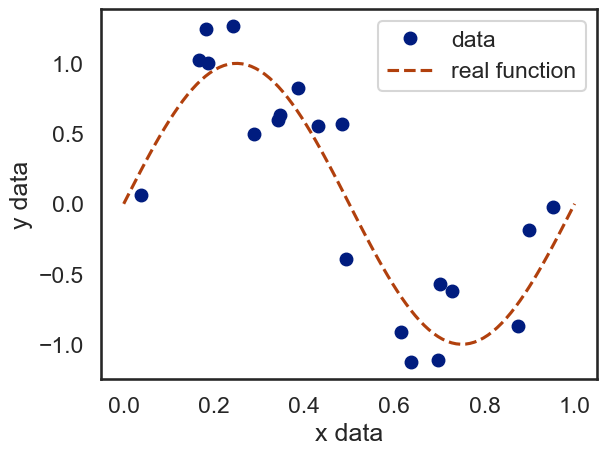

In [6]:
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')

ax=data.set_index('x')['y'].plot(ls='',marker='o',label='data')
ax.plot(X_real,Y_real,ls='--',marker='',label='real function')

ax.legend()
ax.set(xlabel='x data', ylabel='y data');

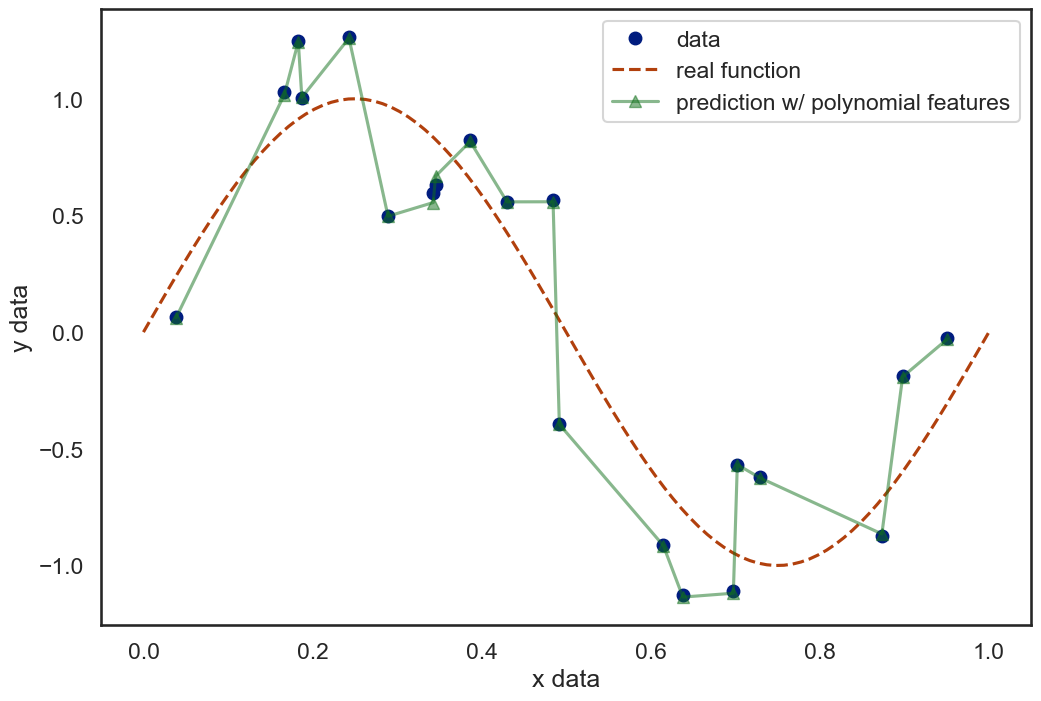

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degree = 20
pf=PolynomialFeatures(degree)
lr=LinearRegression()

X_data=data[['x']]
Y_data=data['y']

X_poly=pf.fit_transform(X_data)
lr=lr.fit(X_poly,Y_data)
Y_pred=lr.predict(X_poly)

plt.figure(figsize=(12,8))
plt.plot(X_data,Y_data,marker='o',ls='',label='data',alpha=1)
plt.plot(X_real,Y_real,ls='--',label='real function')
plt.plot(X_data,Y_pred,marker='^',alpha=.5,label='prediction w/ polynomial features')
plt.legend()
ax=plt.gca()
ax.set(xlabel='x data', ylabel='y data');

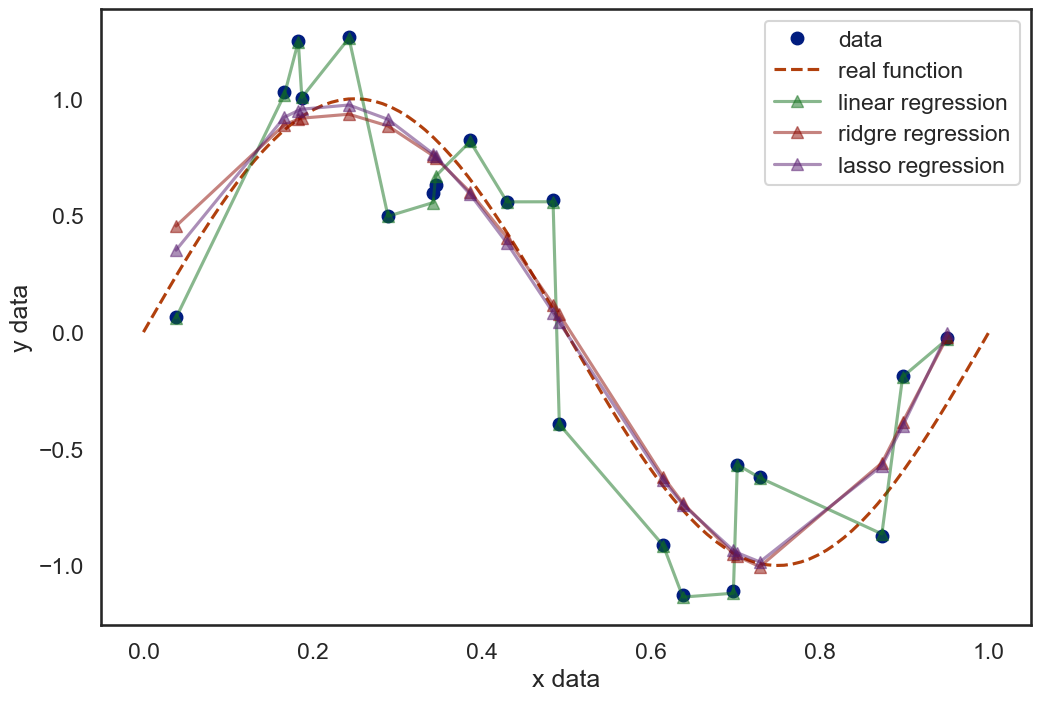

In [15]:
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import Ridge, Lasso

rr=Ridge(alpha=0.001)
rr=rr.fit(X_poly,Y_data)
Y_pred_rr=rr.predict(X_poly)

lassor=Lasso(alpha=0.0001)
lassor=lassor.fit(X_poly,Y_data)
Y_pred_lr=lassor.predict(X_poly)

plt.figure(figsize=(12,8))
plt.plot(X_data,Y_data,marker='o',ls='',label='data')
plt.plot(X_real,Y_real,ls='--',label='real function')
plt.plot(X_data,Y_pred,marker='^',alpha=.5,label='linear regression')
plt.plot(X_data,Y_pred_rr,marker='^',alpha=.5,label='ridgre regression')
plt.plot(X_data,Y_pred_lr,marker='^',alpha=.5,label='lasso regression')
plt.legend()
ax=plt.gca()
ax.set(xlabel='x data', ylabel='y data');


In [16]:
coefficients=pd.DataFrame()
coefficients['linear regression']=lr.coef_.ravel()
coefficients['ridge regression']=rr.coef_.ravel()
coefficients['lasso regression']=lassor.coef_.ravel()
coefficients=coefficients.applymap(abs)
coefficients.describe()


,linear regression,ridge regression,lasso regression
count,2.100000e+01,21.000000,21.000000
mean,5.754304e+13,2.169397,2.167284
std,5.999233e+13,2.900278,4.706731
min,1.611590e+07,0.000000,0.000000
25%,3.403676e+12,0.467578,0.000000
50%,3.649017e+13,1.017272,0.252181
75%,1.061917e+14,2.883507,1.641353
max,1.639660e+14,12.429635,20.176708


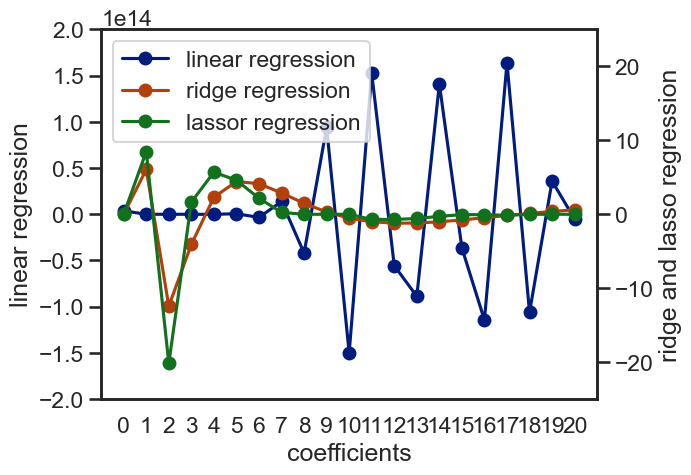

<Figure size 2000x1000 with 0 Axes>

In [23]:
colors = sns.color_palette()

ax1 = plt.axes()
ax2 = ax1.twinx()

ax1.plot(lr.coef_.ravel(),color=colors[0],marker='o',label='linear regression')
ax2.plot(rr.coef_.ravel(),color=colors[1],marker='o',label='ridge regression')
ax2.plot(lassor.coef_.ravel(),color=colors[2],marker='o',label='lassor regression')

ax1.set_ylim(-2e14,2e14)
ax2.set_ylim(-25, 25)

h1, l1=ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

plt.figure(figsize=(20,10))
ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

ax1.set_xticks(range(len(lr.coef_)));

In [24]:
data=pd.read_csv('Ames_Housing_Sales.csv')
data.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,NaN,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0
5,796.0,566.0,320.0,NaN,1,1Fam,TA,No,732.0,0.0,...,0.0,Pave,5,796.0,AllPub,40.0,1993,1995,2009,143000.0
6,1694.0,0.0,0.0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,0.0,Pave,7,1686.0,AllPub,255.0,2004,2005,2007,307000.0
7,1107.0,983.0,0.0,NaN,3,1Fam,TA,Mn,859.0,32.0,...,0.0,Pave,7,1107.0,AllPub,235.0,1973,1973,2009,200000.0
8,1022.0,752.0,0.0,NaN,2,1Fam,NaN,NaN,0.0,0.0,...,0.0,Pave,8,952.0,AllPub,90.0,1931,1950,2008,129900.0
9,1077.0,0.0,0.0,NaN,2,2fmCon,TA,No,851.0,0.0,...,0.0,Pave,5,991.0,AllPub,0.0,1939,1950,2008,118000.0


In [25]:
len(data.columns)

80

In [26]:
data=pd.get_dummies(data,drop_first=True)
data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'Street_Pave', 'Utilities_NoSeWa'],
      dtype='object', length=241)

In [27]:
from sklearn.model_selection import train_test_split

train, test=train_test_split(data,test_size=0.3,random_state=42)

In [30]:
mask=data.apply(lambda x: x.nunique())>2
num_cols=data.columns[mask]

In [31]:
skew_limit=0.75
skew_vals=train[num_cols].skew()

skew_cols= (skew_vals[skew_vals>skew_limit]
            .sort_values(ascending=False)
            .to_frame()
            .rename(columns={0:'skew'}))
skew_cols

,skew
MiscVal,26.915364
PoolArea,15.777668
LotArea,11.501694
LowQualFinSF,11.210638
3SsnPorch,10.150612
KitchenAbvGr,5.497813
ScreenPorch,4.599803
BsmtFinSF2,4.466378
BsmtHalfBath,3.882163
EnclosedPorch,3.218303


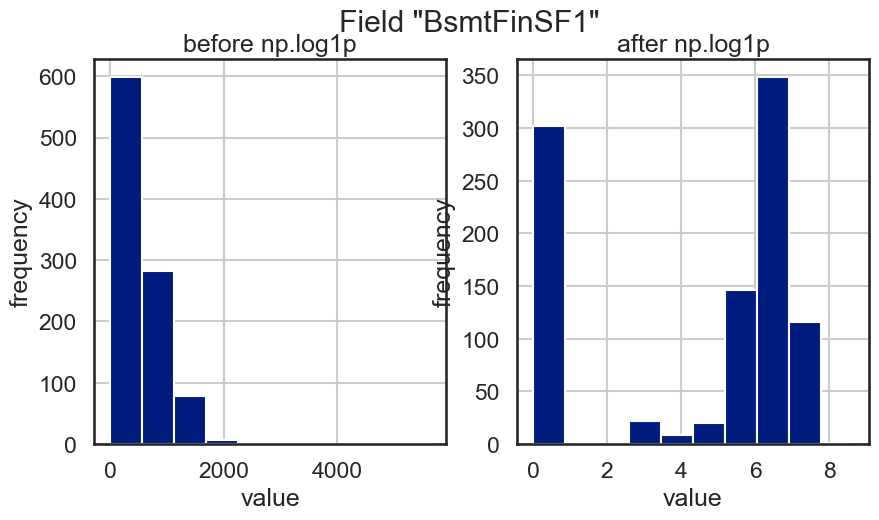

In [34]:
field="BsmtFinSF1"
fig,(ax_before,ax_after)=plt.subplots(1,2,figsize=(10,5))
train[field].hist(ax=ax_before)
train[field].apply(np.log1p).hist(ax=ax_after)
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [35]:
pd.options.mode.chained_assignment=None

for col in skew_cols.index.tolist():
    if col== "SalePrice":
        continue
    train[col]=np.log1p(train[col])
    test[col]=test[col].apply(np.log1p)

In [36]:
feature_cols=[x for x in train.columns if x!='SalePrice']
X_train=train[feature_cols]
Y_train=train['SalePrice']

X_test=test[feature_cols]
Y_test=test['SalePrice']

In [37]:
from sklearn.metrics import mean_squared_error

def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue,ypredicted))

In [39]:
from sklearn.linear_model import LinearRegression

linearRegression=LinearRegression().fit(X_train,Y_train)

linearRegression_rmse=rmse(Y_test,linearRegression.predict(X_test))

print(linearRegression_rmse)

41990.51181064204


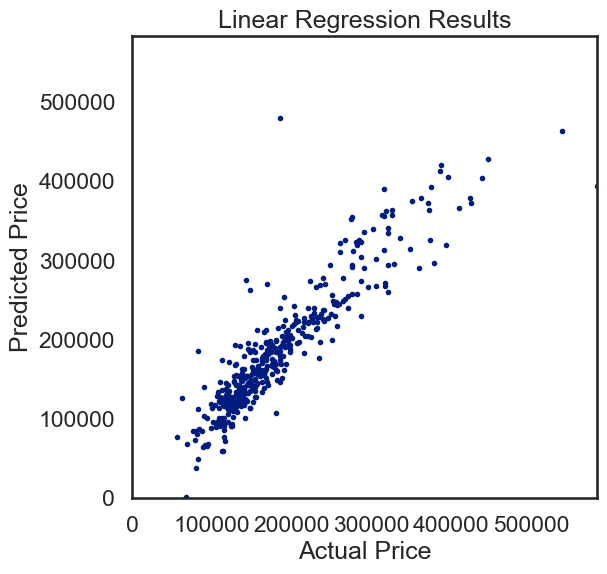

In [40]:
f=plt.figure(figsize=(6,6))
ax=plt.axes()

ax.plot(Y_test,linearRegression.predict(X_test),marker='o',ls='',ms=3.0)

lim=(0,Y_test.max())

ax.set(xlabel='Actual Price',
       ylabel='Predicted Price',
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

In [41]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, Y_train)

ridgeCV_rmse = rmse(Y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

10.0 32194.329032971134


In [53]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([0.005,0.05,0.01,1,5,20,50,80,100,120,140])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=50000,
                  cv=3).fit(X_train, Y_train)

lassoCV_rmse = rmse(Y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse) 

120.0 36967.814167066164


In [54]:
print('of{} coefficients , {} are non-zero with lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))

of240 coefficients , 101 are non-zero with lasso.


In [59]:
from sklearn.linear_model import ElasticNetCV

l1_ratios=np.linspace(0.1,0.9,9)

elasticNetCV =ElasticNetCV(alphas=alphas2,
                           l1_ratio=l1_ratios,
                           max_iter=10000 ).fit(X_train,Y_train)
elasticNetCV_rmse=rmse(Y_test,elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_,elasticNetCV.l1_ratio_,elasticNetCV_rmse)

0.05 0.8 32201.342923370496


In [60]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,41990.511811
Ridge,32194.329033
Lasso,36967.814167
ElasticNet,32201.342923


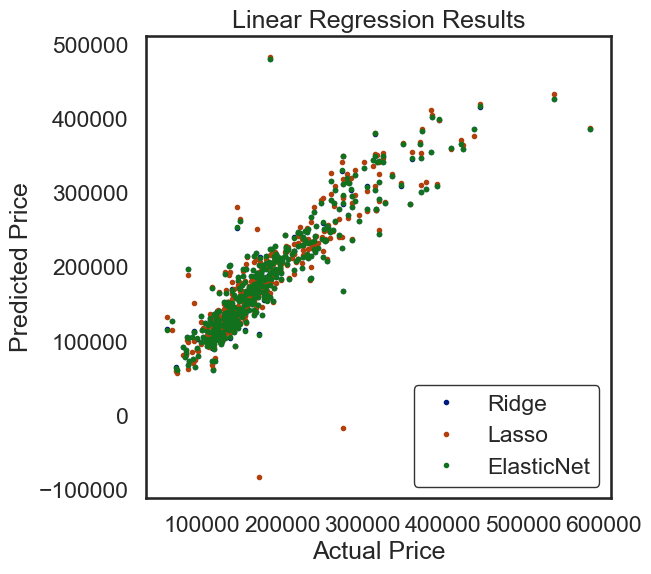

In [61]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(Y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Linear Regression Results');

In [68]:
from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': None},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train, Y_train)
    new_rmses[modellabel] = rmse(Y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD
Linear,41990.511811,1.409046e+16
Ridge,32194.329033,2.949913e+15
Lasso,36967.814167,2.414651e+15
ElasticNet,32201.342923,9.404318e+15


In [70]:
from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': None},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(eta0=1e-7, **parameters)
    SGD.fit(X_train, Y_train)
    new_rmses[modellabel] = rmse(Y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD-learningrate'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate
Linear,41990.511811,1.409046e+16,74891.925261
Ridge,32194.329033,2.949913e+15,75020.424762
Lasso,36967.814167,2.414651e+15,73979.236520
ElasticNet,32201.342923,9.404318e+15,73296.754008


In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, Y_train)
    new_rmses[modellabel] = rmse(Y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate,RMSE-SGD-scaled
Linear,41990.511811,1.409046e+16,74891.925261,32269.921554
Ridge,32194.329033,2.949913e+15,75020.424762,77766.745239
Lasso,36967.814167,2.414651e+15,73979.236520,77233.970579
ElasticNet,32201.342923,9.404318e+15,73296.754008,31930.045428
